In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import seaborn as sns
import pandas as pd
from astropy.time import Time
import lightkurve as lk
from astropy.stats import sigma_clip

<Axes: title={'center': 'ZTF Lightcurve in R Band'}, xlabel='Time [JD]', ylabel='Flux'>

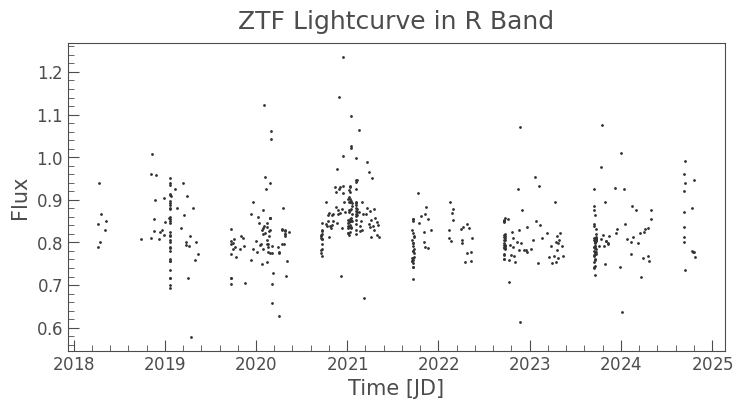

In [111]:
# ztf fluxes
ztf_file = '/Users/shaunparasher/Documents/VS Code/denison_2026_test/shaun/Data/ZTF Data/lc_samiclagn.fits'
ztf_data = fits.open(ztf_file)[1].data
mag_ztf = ztf_data['mag']
mag_err_ztf = ztf_data['magerr']
hjd_ztf = ztf_data['hjd']

flux = 3631 * 10**(-0.4 * mag_ztf) * 1000
flux_err = flux * 0.921 * mag_err_ztf

t = Table.read(ztf_file)

time_ztf = Time(hjd_ztf, format='jd')
time_ztf = time_ztf.decimalyear

t_years = Time(hjd_ztf, format='jd').decimalyear
curve = lk.LightCurve(time=t_years, flux=flux, flux_err=flux_err)
curve.scatter(title="ZTF Lightcurve in R Band")

Text(0, 0.5, 'Flux (mJy)')

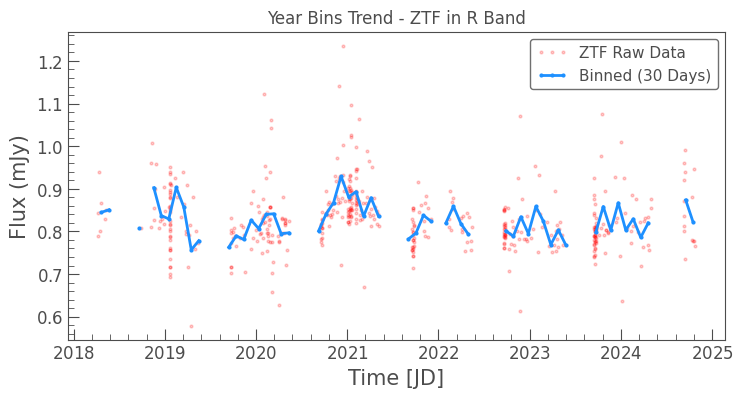

In [112]:
days = 30
bin_size = days / 365.25
binned_curve = curve.bin(time_bin_size=bin_size)
ax = curve.plot(alpha=0.2, label='ZTF Raw Data', color='red', marker='o', linestyle='none')
binned_curve.plot(ax=ax, color='dodgerblue', linewidth=2, marker='o', label=f'Binned ({days} Days)')
ax.set_title("Year Bins Trend - ZTF in R Band")
ax.set_ylabel("Flux (mJy)")

In [113]:
# atlas mags
#index of band is 5


filepath = '/Users/shaunparasher/Documents/VS Code/denison_2026_test/shaun/Data/ATLAS data/job3635727.txt'

catt = []
with open(filepath, 'r') as atlas:

    for i in atlas:
        catt.append(i.split())
    
    cat = np.array(catt)

    o_cat = np.array([])

    mask = (cat[:, 5] == 'o')
    o_cat = cat[mask]

mjd = o_cat[:, 0].astype(float)
flux = o_cat[:, 3].astype(float) / 1000
flux_err = o_cat[:, 4].astype(float) / 1000

sigma = 3

flux_clipped = sigma_clip(flux, sigma=sigma, maxiters=5)
n_mask = ~flux_clipped.mask
mjd_clean = mjd[n_mask]
flux_clean = flux[n_mask]
flux_err_clean = flux_err[n_mask]


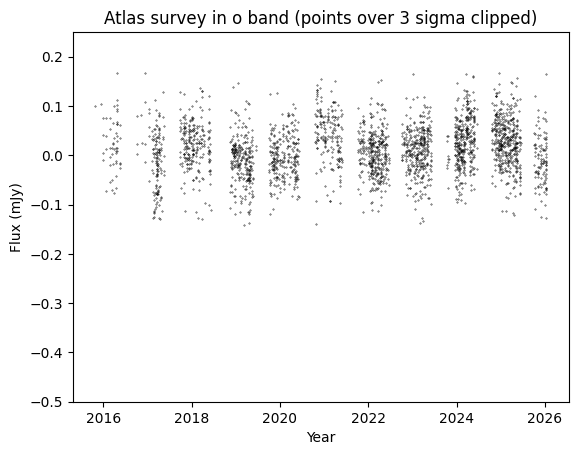

In [114]:
t_years = Time(mjd_clean, format='mjd').decimalyear
plt.ylim(-0.5, 0.25)
plt.scatter(t_years, flux_clean, color='black', s=0.1)
plt.xlabel('Year')
plt.ylabel('Flux (mJy)')
plt.title(f"Atlas survey in o band (points over {sigma} sigma clipped)")
plt.show()

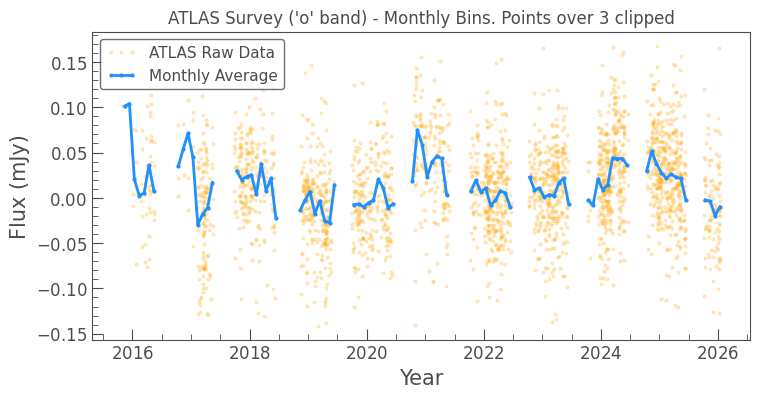

In [ ]:
atlas_lc = lk.LightCurve(time=t_years, flux=flux_clean, flux_err=flux_err_clean)
ax = atlas_lc.plot(alpha=0.2, color='orange',marker='o', linestyle='none', label='ATLAS Raw Data')
atlas_binned = atlas_lc.bin(time_bin_size=1/12)
atlas_binned.plot(ax=ax, color='dodgerblue', linewidth=2, marker='o', label='Monthly Average')


ax.set_title(f"ATLAS Survey ('o' band) - Monthly Bins. Points over {sigma} clipped")
ax.set_ylabel("Flux (mJy)")
ax.set_xlabel("Year")
plt.show()



In [118]:
start_search = 2020.0
end_search = 2022.0

window_mask = (t_years >= start_search) & (t_years <= end_search)

window_mjd = mjd_clean[window_mask]
window_flux = flux_clean[window_mask]

peak_index = np.argmax(window_flux)

spike_mjd = window_mjd[peak_index]
spike_flux = window_flux[peak_index]

print(f"Peak MJD: {spike_mjd:.4f}")
print(f"Peak Flux: {spike_flux:.2f} MJy")

Peak MJD: 59190.5321
Peak Flux: 0.15 MJy
